# Face Numbers of Random Polytopes

In order to test the perfromance of their algorithms in polyhedral geometry people often employ random constructions.  While this is a good idea, combinatorially such polytopes are very restricted.

This will be demonstrated in this notebook by looking at random 6-polytopes.

Relevant publications on the subject include:

* Buchta, Müller & Tichy: Stochastical approximation of convex bodies, <i>Math. Ann.</i> <b>271</b> (1985)
* Borgwardt: The simplex method. A probabilistic analysis, Springer (1987).

Author: <a href="https://page.math.tu-berlin.de/~joswig/">Michael Joswig</a>

In [1]:
using Polymake

polymake version 4.0
Copyright (c) 1997-2020
Ewgenij Gawrilow, Michael Joswig, and the polymake team
Technische Universität Berlin, Germany
https://polymake.org

This is free software licensed under GPL; see the source for copying conditions.
There is NO warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



Produce a 6-dimensional polytope with 20 vertices, drawn uniformly at random on the unit sphere, and print its f-vector.

In [2]:
P = polytope.rand_sphere(6,20)
P.F_VECTOR

polymake: used package ppl
  The Parma Polyhedra Library ([[wiki:external_software#PPL]]): A C++ library for convex polyhedra
  and other numerical abstractions.
  http://www.cs.unipr.it/ppl/



pm::Vector<pm::Integer>
20 166 640 1190 1044 348

Now for the g-vector of the same polytope, but this time it is converted to a Julia Array.

In [3]:
g = convert(Array{Int32},P.G_VECTOR)

4-element Array{Int32,1}:
  1
 13
 67
 75

Let's do a census of 100 random samples and plot the result.  Since g_0=1 and g_1=#vertices-dimension-1 are constant, it suffices to plot g_2 versus g_3.

In [4]:
n_vertices=30
n_samples=100
g_vectors = Array{Int32}(undef,n_samples,2)

for i=1:n_samples
    RS = polytope.rand_sphere(6,n_vertices)
    g = RS.G_VECTOR
    g_vectors[i,1] = g[3] # notice index shift as Julia counts from 1
    g_vectors[i,2] = g[4]
end

We use the Plots package for visual output.

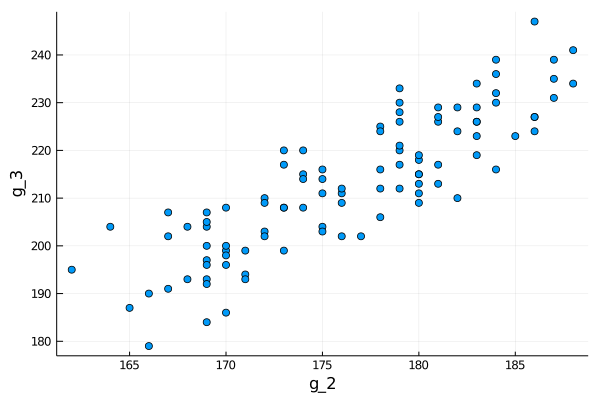

In [5]:
using Plots
scatter(g_vectors[:,1], g_vectors[:,2], xlabel="g_2", ylabel="g_3", legend=false)

Compare the empirically found upper bound for the g_3 values with the true bound from Stanley's g-theorem.

In [6]:
min_g2 = minimum(g_vectors[:,1])
max_g2 = maximum(g_vectors[:,1])
ub = [ Int(polytope.pseudopower(g2,2)) for g2 in min_g2:max_g2 ];

Compare with the maximal g-vector from McMullen's upper bound theorem shows that the random polytopes have rather few faces.

In [7]:
polytope.upper_bound_theorem(6,n_vertices).G_VECTOR

pm::Vector<pm::Integer>
1 23 276 2300

The lesson to learn here is the following.

By just looking at this class of random polytopes, one cannot get an adequate intuition about the set of all 6-polytopes with 20 vertices, not even the simplicial ones.